# Boston Housing Dataset

### Load the libraries

In [67]:
import warnings
import json
import sys
import csv
import os

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import numpy as np
np.random.seed(1612)

## Access the dataset from Google Drive

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part A: Data Exploration

### Load the Dataset

In [69]:
housing_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Boston/BostonHousing.csv') 

### Dimension of the dataframe

In [70]:
housing_df.shape 

(167, 19)

### Check the type of all columns

In [71]:
housing_df.dtypes

CRIM           float64
ZN             float64
INDUS           object
CHAS             int64
NOX             object
RM             float64
AGE            float64
DIS             object
RAD              int64
TAX              int64
PTRATIO         object
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
dtype: object

### Print the first 20 rows

In [72]:
housing_df.head(20) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,,3,222,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.02985,0.0,****,0,0.458,6.430,58.7,6.0622,3,222,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.08829,12.5,7.07,0,0.524,6.012,66.6,5.5605,5,311,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.14455,12.5,****,0,0.524,6.172,96.1,5.9505,5,311,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.17004,12.5,****,0,0.524,6.004,85.9,6.5921,5,311,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
print(housing_df)

        CRIM    ZN INDUS  ...  Unnamed: 16 Unnamed: 17  Unnamed: 18
0    0.00632  18.0  2.31  ...          NaN         NaN          NaN
1    0.02731   0.0  7.07  ...          NaN         NaN          NaN
2    0.02729   0.0  7.07  ...          NaN         NaN          NaN
3    0.03237   0.0  2.18  ...          NaN         NaN          NaN
4    0.06905   0.0  7.07  ...          NaN         NaN          NaN
..       ...   ...   ...  ...          ...         ...          ...
162  0.12579  45.0  3.44  ...          NaN         NaN          NaN
163  0.08370  45.0  3.44  ...          NaN         NaN          NaN
164  0.09068  45.0   NaN  ...          NaN         NaN          NaN
165  0.06911  45.0  3.44  ...          NaN         NaN          NaN
166  0.08664  45.0  3.44  ...          NaN         NaN          NaN

[167 rows x 19 columns]


### Print dataframe's description

In [74]:
print(housing_df.describe())

             CRIM          ZN  ...  Unnamed: 17  Unnamed: 18
count  167.000000  167.000000  ...          0.0          0.0
mean     0.295958    9.032934  ...          NaN          NaN
std      0.548701   19.952137  ...          NaN          NaN
min      0.006320    0.000000  ...          NaN          NaN
25%      0.067620    0.000000  ...          NaN          NaN
50%      0.122040    0.000000  ...          NaN          NaN
75%      0.223505   12.500000  ...          NaN          NaN
max      4.097400  100.000000  ...          NaN          NaN

[8 rows x 15 columns]


### Check datatypes of each columns

In [75]:
housing_df.dtypes

CRIM           float64
ZN             float64
INDUS           object
CHAS             int64
NOX             object
RM             float64
AGE            float64
DIS             object
RAD              int64
TAX              int64
PTRATIO         object
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
dtype: object

As the later steps will show that INDUS, NOX, DIS, PTRATIO are the 4 main columns having NaN and missing values. So I will apply techniques to make sure their types are back to float.

### Statistics of NaN values by columns

This hasn't show the other missing values yet. It will be shown later.

In [76]:
housing_df.isnull().sum()

CRIM             0
ZN               0
INDUS           20
CHAS             0
NOX              2
RM               0
AGE              0
DIS              3
RAD              0
TAX              0
PTRATIO          0
Unnamed: 11    167
Unnamed: 12    167
Unnamed: 13    167
Unnamed: 14    167
Unnamed: 15    167
Unnamed: 16    167
Unnamed: 17    167
Unnamed: 18    167
dtype: int64

### Highlight the existing NaN values

In [77]:
housing_df.style.highlight_null('yellow')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.006320,18.000000,2.31,0,0.538,6.575000,65.200000,4.09,1,296,15.3,nan,nan,nan,nan,nan,nan,nan,nan
1,0.027310,0.000000,7.07,0,0.469,6.421000,78.900000,4.9671,2,242,17.8,nan,nan,nan,nan,nan,nan,nan,nan
2,0.027290,0.000000,7.07,0,0.469,7.185000,61.100000,4.9671,2,242,17.8,nan,nan,nan,nan,nan,nan,nan,nan
3,0.032370,0.000000,2.18,0,0.458,6.998000,45.800000,6.0622,3,222,18.7,nan,nan,nan,nan,nan,nan,nan,nan
4,0.069050,0.000000,7.07,0,0.458,7.147000,54.200000,,3,222,18.7,nan,nan,nan,nan,nan,nan,nan,nan
5,0.029850,0.000000,****,0,0.458,6.430000,58.700000,6.0622,3,222,137,nan,nan,nan,nan,nan,nan,nan,nan
6,0.088290,12.500000,7.07,0,0.524,6.012000,66.600000,5.5605,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
7,0.144550,12.500000,****,0,0.524,6.172000,96.100000,5.9505,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
8,0.211240,12.500000,7.87,0,0.524,5.631000,100.000000,6.0821,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
9,0.170040,12.500000,****,0,0.524,6.004000,85.900000,6.5921,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan


In [78]:
housing_df[['INDUS', 'NOX', 'DIS', 'PTRATIO']].values[4][0]

'7.07'

In [79]:
housing_df[['INDUS', 'NOX', 'DIS', 'PTRATIO']].values[5][0]

'****'

In [80]:
type(housing_df[['INDUS', 'NOX', 'DIS', 'PTRATIO']].values[4][0])

str

In [81]:
type(housing_df[['INDUS', 'NOX', 'DIS', 'PTRATIO']].values[5][0])

str

### Highlight both Missing Data and NaN

The above code line is not efficient to highlight both Missing values and NaN values, but only NaN in Yellow. So I wrote a function to highlight Missing values in Dark Orange and NaN values in Yellow.

As I could see above that the columns of 'INDUS', 'NOX', 'DIS', 'PTRATIO' should have had 3 types: string, float and nan instead of only string as exemplified earlier. I would use while loop to try cast the cell value with float type. If error happens, that cell will be highlighted in dark orange. Another if condition will detect NaN values for each cell. If true, it will be highlighted in yellow. Otherwise, the normal data values will be kept as usual.



In [82]:
import math
def highlight_missing_and_nan(cell_value):

    highlight_missing_values = 'background-color: darkorange;'
    highlight_nan = 'background-color: yellow;'
    default = ''

    #if isinstance(cell_value, int) == True or isinstance(cell_value, float) == True:
    #if type(cell_value) not in [str, np.nan]:
    while True:
        try:
            cell_value = float(cell_value)
            break
        except ValueError:
            return highlight_missing_values    
    # if float(cell_value) == False:
    #     return highlight
    if math.isnan(cell_value) == True:
        return highlight_nan
    return default

housing_df.style.applymap(highlight_missing_and_nan)
#housing_df[['INDUS', 'NOX', 'DIS', 'PTRATIO']].style.applymap(highlight_missing_and_nan)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.006320,18.000000,2.31,0,0.538,6.575000,65.200000,4.09,1,296,15.3,nan,nan,nan,nan,nan,nan,nan,nan
1,0.027310,0.000000,7.07,0,0.469,6.421000,78.900000,4.9671,2,242,17.8,nan,nan,nan,nan,nan,nan,nan,nan
2,0.027290,0.000000,7.07,0,0.469,7.185000,61.100000,4.9671,2,242,17.8,nan,nan,nan,nan,nan,nan,nan,nan
3,0.032370,0.000000,2.18,0,0.458,6.998000,45.800000,6.0622,3,222,18.7,nan,nan,nan,nan,nan,nan,nan,nan
4,0.069050,0.000000,7.07,0,0.458,7.147000,54.200000,,3,222,18.7,nan,nan,nan,nan,nan,nan,nan,nan
5,0.029850,0.000000,****,0,0.458,6.430000,58.700000,6.0622,3,222,137,nan,nan,nan,nan,nan,nan,nan,nan
6,0.088290,12.500000,7.07,0,0.524,6.012000,66.600000,5.5605,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
7,0.144550,12.500000,****,0,0.524,6.172000,96.100000,5.9505,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
8,0.211240,12.500000,7.87,0,0.524,5.631000,100.000000,6.0821,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan
9,0.170040,12.500000,****,0,0.524,6.004000,85.900000,6.5921,5,311,15.2,nan,nan,nan,nan,nan,nan,nan,nan


## Part B: Handling the columns with missing data (NaN and string in numerical columns)

3 columns: INDUS, NOX, DIS have missing values and NaN. I will handle each column.

These columns have NaN on all rows. I will delete them first: Unnamed: 11	
Unnamed: 12	
Unnamed: 13	
Unnamed: 14	
Unnamed: 15	
Unnamed: 16	
Unnamed: 17	
Unnamed: 18

### B.1. Omission: Deleting columns with all NaN values

In [83]:
housing_df = housing_df.drop(housing_df.columns[[11, 12, 13, 14, 15, 16, 17, 18]], axis=1)

In [84]:
print(housing_df)

        CRIM    ZN INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX PTRATIO
0    0.00632  18.0  2.31     0  0.538  6.575  65.2    4.09    1  296    15.3
1    0.02731   0.0  7.07     0  0.469  6.421  78.9  4.9671    2  242    17.8
2    0.02729   0.0  7.07     0  0.469  7.185  61.1  4.9671    2  242    17.8
3    0.03237   0.0  2.18     0  0.458  6.998  45.8  6.0622    3  222    18.7
4    0.06905   0.0  7.07     0  0.458  7.147  54.2            3  222    18.7
..       ...   ...   ...   ...    ...    ...   ...     ...  ...  ...     ...
162  0.12579  45.0  3.44     0  0.437  6.556  29.1  4.5667    5  398    15.2
163  0.08370  45.0  3.44     0  0.437  7.185  38.9  4.5667    5  398    15.2
164  0.09068  45.0   NaN     0  0.437  6.951  21.5  6.4798    5  398    15.2
165  0.06911  45.0  3.44     0  0.437  6.739  30.8  6.4798    5  398    15.2
166  0.08664  45.0  3.44     0  0.437  7.178  26.3  6.4798    5  398    15.2

[167 rows x 11 columns]


#### Replace missing values with NaN for the column INDUS

In [85]:
housing_df['INDUS'].unique().tolist()

['2.31',
 '7.07',
 '2.18',
 '****',
 '7.87',
 nan,
 '8.14',
 'Sara',
 '5.96',
 '2.95',
 '6.91',
 '5.64',
 '4',
 '1.22',
 '0.74',
 '1.32',
 '5.13',
 '1.38',
 '3.37',
 '3.4',
 '10.81',
 '12.83',
 '4.86',
 '4.49',
 '3.41',
 '15.04',
 '2.89',
 '8.56',
 '10.01',
 '*****',
 '25.65',
 '21.89',
 '19.58',
 '4.05',
 '2.46',
 '3.44']

I detected that the column INDUS got missing values including: nana, '****', '*****', 'Sara'. I will leave the exisiting NaN values there and replace these mentioned 3 strings into NaN values.

#### Using median to replace NaN

In [86]:
housing_df.INDUS.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164     True
165    False
166    False
Name: INDUS, Length: 167, dtype: bool

Indices of column INDUS's rows having NaN

In [87]:
housing_df.loc[housing_df.INDUS.isnull(), 'INDUS'] 

11     NaN
24     NaN
37     NaN
38     NaN
40     NaN
50     NaN
59     NaN
61     NaN
76     NaN
77     NaN
83     NaN
84     NaN
102    NaN
110    NaN
124    NaN
125    NaN
129    NaN
147    NaN
155    NaN
164    NaN
Name: INDUS, dtype: object

In [88]:
housing_df['INDUS'] = housing_df['INDUS'].replace(['****', '*****', 'Sara'], np.nan)

In [89]:
median_INDUS = housing_df['INDUS'].median()
median_INDUS

8.14

In [90]:
housing_df['INDUS'].fillna(housing_df['INDUS'].median(), inplace=True)

In [91]:
housing_df.head(167)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2
164,0.09068,45.0,8.14,0,0.437,6.951,21.5,6.4798,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2


### B.2. Imputation: Replacing

Replacing string data in the numerical columns with NaN & Replacing NaN with median values of each column. These are Outliers due to typing `non-numeric` values.


#### Handle missing values with NaN for the column NOX

In [92]:
housing_df['NOX'].unique().tolist()

['0.538',
 '0.469',
 '0.458',
 '0.524',
 nan,
 '0.499',
 '0.428',
 '0.448',
 '0.439',
 '0.41',
 '0.403',
 '0.411',
 '0.453',
 '0.4161',
 '0.398',
 '0.409',
 '0.413',
 '0.437',
 '0.426',
 '*****',
 '0.449',
 '0.489',
 '0.464',
 '0.445',
 '0.52',
 '0.547',
 '0.581',
 '0.624',
 '&&&',
 '0.871',
 '0.51',
 '0.488']

I detected that the column NOX got missing values including: nan, '*****', '&&&'. I will leave the exisiting NaN values there and replace these mentioned 2 strings into NaN values.

In [93]:
housing_df.loc[housing_df.NOX.isnull(), 'NOX'] 

13     NaN
160    NaN
Name: NOX, dtype: object

In [94]:
housing_df['NOX'] = housing_df['NOX'].replace(['*****', '&&&'], np.nan)

In [95]:
housing_df.loc[housing_df.NOX.isnull(), 'NOX'] 

13     NaN
84     NaN
96     NaN
111    NaN
142    NaN
160    NaN
Name: NOX, dtype: object

In [96]:
median_NOX = housing_df['NOX'].median()
median_NOX

0.499

In [97]:
housing_df['NOX'].fillna(housing_df['NOX'].median(), inplace=True)

In [98]:
housing_df.head(167)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2
164,0.09068,45.0,8.14,0,0.437,6.951,21.5,6.4798,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2


#### Handle missing values with NaN for the column DIS


In [99]:
housing_df['DIS'].unique().tolist()

['4.09',
 '4.9671',
 '6.0622',
 ' ',
 '5.5605',
 '5.9505',
 '6.0821',
 '6.5921',
 '6.3467',
 '6.2267',
 '5.4509',
 '4.7075',
 '4.4619',
 '4.4986',
 '4.2579',
 '3.7965',
 '3.7979',
 '4.0123',
 '3.9769',
 '4.0952',
 '4.3996',
 '4.4546',
 '4.682',
 '4.4534',
 '4.4547',
 '4.239',
 '4.233',
 '4.175',
 '3.99',
 '3.7872',
 '3.7598',
 '3.3603',
 '3.3779',
 '3.9342',
 '3.8473',
 '5.4011',
 '5.7209',
 '5.1004',
 '5.6894',
 '5.87',
 '6.0877',
 '6.8147',
 '7.3197',
 '8.6966',
 '9.1876',
 '8.3248',
 '7.8148',
 '6.932',
 '7.2254',
 '6.8185',
 '7.2255',
 '7.9809',
 '9.2229',
 '6.6115',
 '6.498',
 '5.2873',
 '4.2515',
 '4.5026',
 '4.0522',
 '4.0905',
 '5.0141',
 '5.4007',
 '4.7794',
 '4.4377',
 '4.4272',
 '3.7476',
 nan,
 '3.4145',
 '3.0923',
 '3.0921',
 '3.6659',
 '3.615',
 '3.4952',
 '2.7778',
 '2.8561',
 '2.7147',
 '2.421',
 '2.1069',
 '2.211',
 '2.1224',
 '2.4329',
 '2.5451',
 '2.6775',
 '2.3534',
 '2.548',
 '2.2565',
 '2.4631',
 '2.7301',
 '2.7474',
 '2.4775',
 '2.7592',
 '2.2577',
 '2.1974',
 '2

I detected that the column DIS got missing values including: nan, ' '. I will leave the exisiting NaN values there and replace this mentioned 1 string with NaN value.

In [100]:
housing_df.loc[housing_df.DIS.isnull(), 'DIS'] 

88     NaN
130    NaN
160    NaN
Name: DIS, dtype: object

In [101]:
housing_df['DIS'] = housing_df['DIS'].replace([' '], np.nan)

In [102]:
housing_df.loc[housing_df.DIS.isnull(), 'DIS'] 

4      NaN
88     NaN
130    NaN
160    NaN
Name: DIS, dtype: object

In [103]:
median_DIS = housing_df['DIS'].median()
median_DIS

3.9769

In [104]:
housing_df['DIS'].fillna(housing_df['DIS'].median(), inplace=True)

In [105]:
housing_df.head(167)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,3.9769,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2
164,0.09068,45.0,8.14,0,0.437,6.951,21.5,6.4798,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2


In [106]:
# for k, v in housing_df.items():
#   print(k)
#   #print(v)

In [107]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats

# fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
# index = 0
# axs = axs.flatten()
# for k, v in housing_df.items():
#     sns.boxplot(y=k, data=housing_df, ax=axs[index])
#     index += 1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### Handle missing values with NaN for the column PTRATIO


##### String Outliers

In [108]:
housing_df['PTRATIO'].unique().tolist()

['15.3',
 '17.8',
 '18.7',
 '137',
 '15.2',
 '0.23',
 '21',
 '19',
 '44',
 '46',
 '19.2',
 '47',
 '18.3',
 '17.9',
 '16.8',
 '2.11',
 '17.3',
 '15.1',
 '19.7',
 '18.6',
 '16.1',
 '18.9',
 '177',
 '18.5',
 '18.2',
 '18',
 'Alina',
 '20.9',
 '##',
 'Adam',
 '19.1',
 '21.2',
 '14.7',
 '51.3',
 '50.3',
 '16.6']

I detected that the column PTRATIO got missing values including: 'Alina', '##', 'Adam'. I will replace these mentioned 3 strings with NaN value.

In [109]:
housing_df['PTRATIO'] = housing_df['PTRATIO'].replace(['Alina', '##', 'Adam'], np.nan)

In [110]:
housing_df.loc[housing_df.PTRATIO.isnull(), 'PTRATIO'] 

100    NaN
110    NaN
117    NaN
Name: PTRATIO, dtype: object

In [111]:
median_PTRATIO = housing_df['PTRATIO'].median()
median_PTRATIO

18.7

In [112]:
housing_df['PTRATIO'].fillna(housing_df['PTRATIO'].median(), inplace=True)

In [113]:
housing_df.head(167)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,3.9769,3,222,18.7
...,...,...,...,...,...,...,...,...,...,...,...
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2
164,0.09068,45.0,8.14,0,0.437,6.951,21.5,6.4798,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2


##### Numeric Outliers of PTRATIO

This part is about genuine cases of outliers of PTRATIO that I will print them all out after defining a certain distance of find_boundaries().

In [114]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=housing_df['INDUS'],orient = 'h',)

In [115]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=housing_df['NOX'],orient = 'h',)

In [116]:
# plt.figure(figsize=(20,10))
# sns.boxplot(data=housing_df['DIS'],orient = 'h',)

##### Boxplot

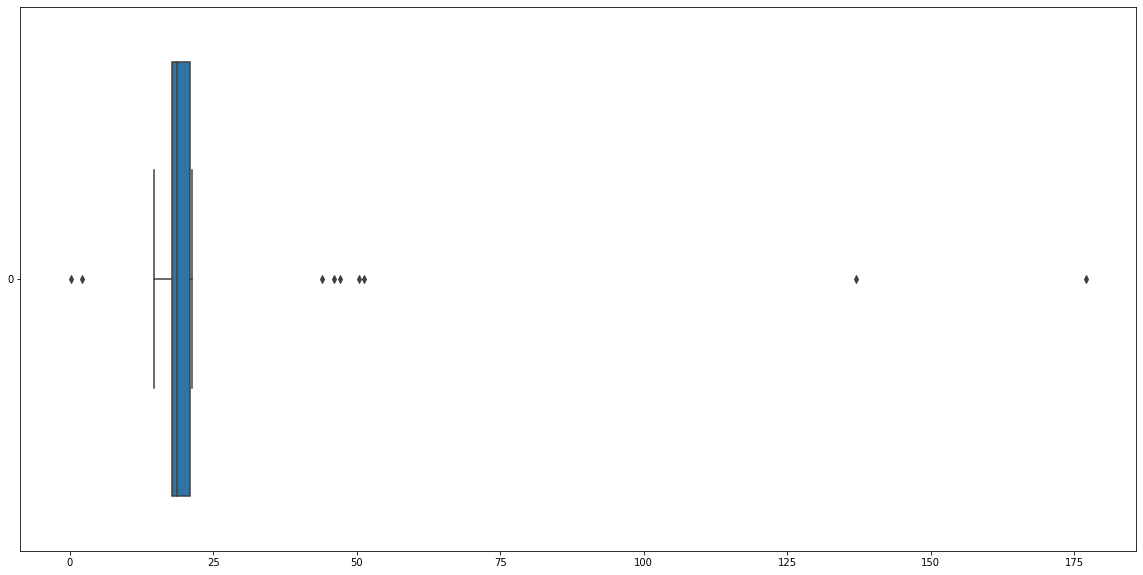

In [117]:
plt.figure(figsize=(20,10))
sns.boxplot(data=housing_df['PTRATIO'],orient = 'h',)

##### Convert PTRATIO types of string and numeric into float

In [118]:
housing_df['PTRATIO'] = pd.to_numeric(housing_df['PTRATIO'], downcast="float")

In [119]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# housing_df['PTRATIO'] = le.fit_transform(housing_df['PTRATIO'].astype(float))

##### Unique values

In [120]:
housing_df['PTRATIO'].unique()

array([ 15.3 ,  17.8 ,  18.7 , 137.  ,  15.2 ,   0.23,  21.  ,  19.  ,
        44.  ,  46.  ,  19.2 ,  47.  ,  18.3 ,  17.9 ,  16.8 ,   2.11,
        17.3 ,  15.1 ,  19.7 ,  18.6 ,  16.1 ,  18.9 , 177.  ,  18.5 ,
        18.2 ,  18.  ,  20.9 ,  19.1 ,  21.2 ,  14.7 ,  51.3 ,  50.3 ,
        16.6 ], dtype=float32)

##### Find boundaries

In [121]:
def find_boundaries(df, variable, distance):

    IQR = housing_df['PTRATIO'].quantile(0.75) - housing_df['PTRATIO'].quantile(0.25)

    lower_boundary = housing_df['PTRATIO'].quantile(0.25) - (IQR * distance)
    upper_boundary = housing_df['PTRATIO'].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [122]:
upper_boundary, lower_boundary = find_boundaries(housing_df, 'PTRATIO', 0.5)
upper_boundary, lower_boundary

(22.449999809265137, 16.249999046325684)

In [123]:
upper_boundary

22.449999809265137

In [124]:
lower_boundary

16.249999046325684

In [125]:
outliers = np.where(housing_df['PTRATIO'] > upper_boundary, True,
            np.where(housing_df['PTRATIO'] < lower_boundary, True, False))

In [126]:
outliers_df = housing_df.loc[outliers, 'PTRATIO']
outliers_df.head(100)

0       15.300000
5      137.000000
6       15.200000
7       15.200000
8       15.200000
9       15.200000
10      15.200000
11      15.200000
12      15.200000
13       0.230000
20      44.000000
22      15.200000
31      46.000000
34      47.000000
54       2.110000
57      15.100000
65      16.100000
66      16.100000
74     177.000000
142     14.700000
143     14.700000
144     51.299999
145     50.299999
161     15.200000
162     15.200000
163     15.200000
164     15.200000
165     15.200000
166     15.200000
Name: PTRATIO, dtype: float32

In [127]:
housing_df.head(167)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.300000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.799999
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.799999
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.700001
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,3.9769,3,222,18.700001
...,...,...,...,...,...,...,...,...,...,...,...
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.200000
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.200000
164,0.09068,45.0,8.14,0,0.437,6.951,21.5,6.4798,5,398,15.200000
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.200000


In [128]:
outliers_df2 = outliers_df.to_frame()
outliers_df2

,PTRATIO
0,15.300000
5,137.000000
6,15.200000
7,15.200000
8,15.200000
9,15.200000
10,15.200000
11,15.200000
12,15.200000
13,0.230000


In [129]:
outliers_list = outliers_df2["PTRATIO"].tolist()
outliers_list

[15.300000190734863,
 137.0,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 0.23000000417232513,
 44.0,
 15.199999809265137,
 46.0,
 47.0,
 2.109999895095825,
 15.100000381469727,
 16.100000381469727,
 16.100000381469727,
 177.0,
 14.699999809265137,
 14.699999809265137,
 51.29999923706055,
 50.29999923706055,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137,
 15.199999809265137]

In [130]:
print("Numer of outliers of PTRATIO with distance=0.5: ", len(outliers_list))

Numer of outliers of PTRATIO with distance=0.5:  29


##### Higlighting numeric Outliers of PTRATIO in housing_df with conditional formatting

In [131]:

# housing_df.style.applymap(lambda x: 'background-color : yellow' if x == housing_df['PTRATIO'].iloc[0,0] else '')

Less explicitly, to work with a DataFrame rather than Series wrap the column names in another set of brackets e.g. df[['a']] instead of df['a'].

In [132]:
def color_outliers_red(val):
    color = 'red' if val < lower_boundary or val > upper_boundary else 'black'
    return 'color: %s' % color

housing_df[['PTRATIO']].style.applymap(color_outliers_red)

,PTRATIO
0,15.300000
1,17.799999
2,17.799999
3,18.700001
4,18.700001
5,137.000000
6,15.200000
7,15.200000
8,15.200000
9,15.200000


## Conclusion

I handled the missing data of INDUS, NOX, DIS by replacing string-typed missing data with NaN values. Then all exising and newly created NaN values were replaced with median values of each column. 

I deleted all the Unamed columns with all 167 NaN rows per column.

I also highlited in yellow for these 3 columns and the Unamed columns.

For the PTRATIO column, there were no NaN values but missing data so we replaced them with this column's median value. The missing values here are the first type of outliers as non-numeric value that we detected in Part A.2.(a). Then I plotted a Box Plot to see all possible outliers. After that, I wrote a function to define upper and lower boundaries for this column with distance = 0.5. This distance can be changed if necessary but I kept it at 0.5. I found 29 outiers with this distance and highlighted them on the smaller dataframe housing_df['PTRATIO'].